<a href="https://colab.research.google.com/github/valerio-unifei/UNIFEI-IA-Aulas/blob/main/UNIFEI_Minera%C3%A7%C3%A3o_de_dados_Clientes_Alvo_para_Shopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

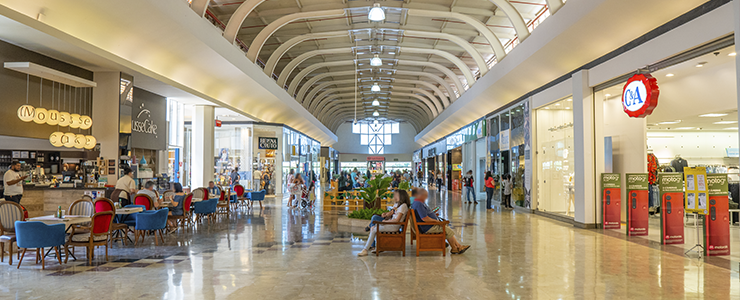

# Dados de segmentação de clientes de shopping
**Análise de cesta de compras**

Você é o dono do shopping e quer entender os clientes como quem pode convergir facilmente "**Clientes alvo**" para que o sentido possa ser dado à equipe de marketing e planeje a estratégia de acordo.

In [17]:
# desativa os Warnings do código (atrapalha a visualização)
import warnings
warnings.filterwarnings('ignore')

In [8]:
# importando dados para análise
import pandas as pd
url = 'https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv'
clientes = pd.read_csv(url)

print('(linhas, colunas) =', clientes.shape)
print('Cabecalho =',clientes.columns)

(linhas, colunas) = (200, 5)
Cabecalho = Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [9]:
# 5 primeiras linhas do arquivo
clientes.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Descrição das colunas:**
* CustomerID - ID exclusivo atribuído ao cliente
* Gender - Gênero do cliente
* Age - Idade do cliente
* Annual Income (k$) - Renda anual do cliente
* Spending Score (1-100) - Pontuação atribuída pelo shopping com base no comportamento do cliente e natureza dos gastos

In [10]:
# removendo coluna de identificador 'CustomerID'
clientes = clientes.drop(['CustomerID'],axis=1)
clientes.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [11]:
# convertendo coluna string para numérica
clientes['Genre'] = clientes['Genre'].factorize()[0]
clientes.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


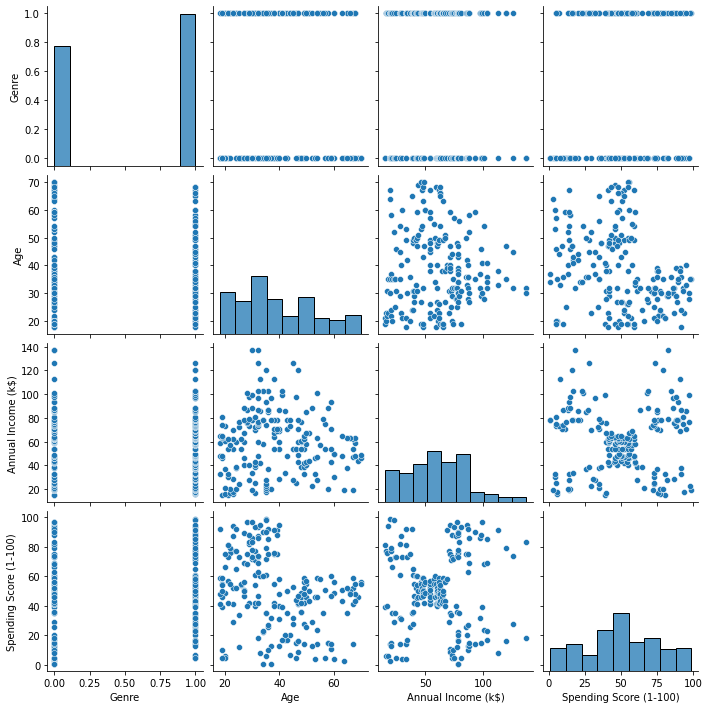

In [14]:
# analisando comportamento das colunas
import seaborn as sns
sns.pairplot(clientes[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

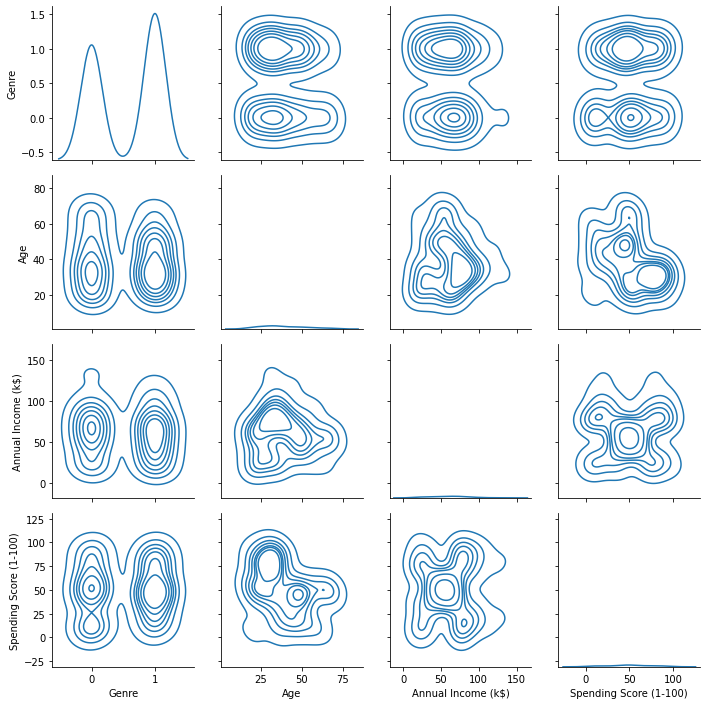

In [16]:
# distribuições dos pontos e densidades
g = sns.PairGrid(clientes[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=8);

**Baseado nas densidades acima:**

Os generos (masculino e feminino) parecem balanceados para as três combinações.
Será verificado abaixo.



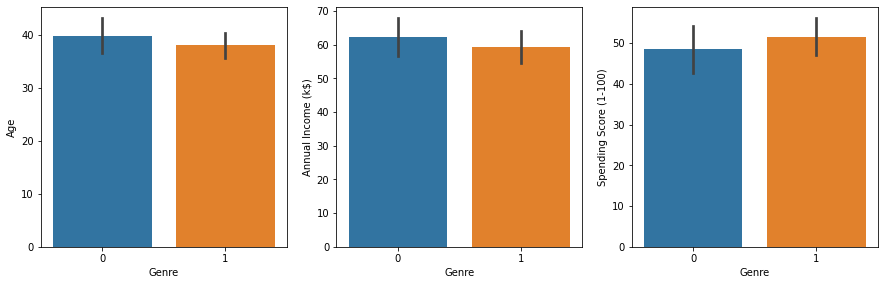

In [19]:
import matplotlib.pyplot as plt
from matplotlib import cm

# verificando balanceamento dos gêneros
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3,3,1)
sns.barplot(y='Age',x='Genre', data=clientes)
ax2 = fig.add_subplot(3,3,2)
sns.barplot(y='Annual Income (k$)',x='Genre', data=clientes)
ax3 = fig.add_subplot(3,3,3)
sns.barplot(y='Spending Score (1-100)',x='Genre', data=clientes)

**Análise PCA**

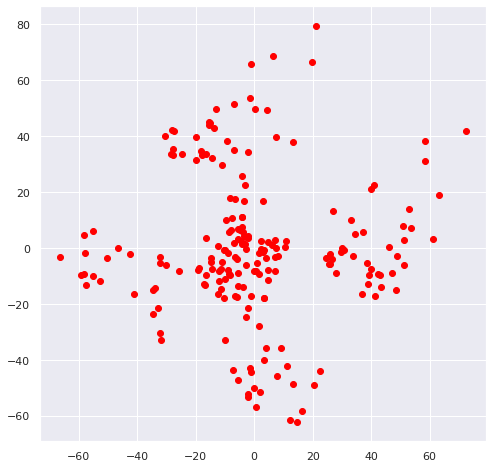

In [21]:
from sklearn.decomposition import PCA as PCA

pca = PCA(n_components=2)
pca.fit(clientes)
Xpca = pca.transform(clientes)
sns.set()
plt.figure(figsize=(8,8))
plt.scatter(Xpca[:,0],Xpca[:,1], c='Red')
plt.show()

É possível observar uma relação entre Renda Anual e Pontuação de Gastos.

Os dados estão bem concentrados em 5 grupos básicos. Isso indica capacidade de clusterização deste dataset.

**Análise TSNE**

A incorporação de vizinhos estocásticos com distribuição T é um método estatístico para visualizar dados de alta dimensão, dando a cada ponto de dados uma localização em um mapa bidimensional ou tridimensional.

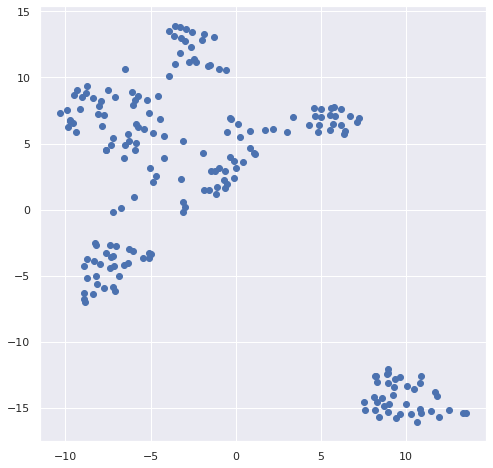

In [22]:
from sklearn.manifold import TSNE

tsn = TSNE()
res_tsne = tsn.fit_transform(clientes)
plt.figure(figsize=(8,8))
plt.scatter(res_tsne[:,0],res_tsne[:,1]);

O TSNE mostra que os pontos formam agrupamentos distintos, portanto a clusterização é viável para este dataset.

Olhando os grupos, são 5 conjuntos distintos. Sugestão para o algoritmo de clusterização ser ajustado.

Agora os grupos que o PCA que pareciam ser uniformes e homogênios não são descritos da mesma forma no TSNE, portanto não seria recomendado o uso do K-Means para esta clusterização.



**Clusterização**

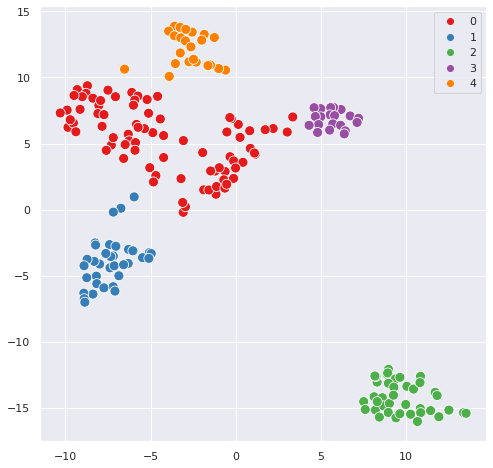

In [23]:
from sklearn.cluster import AgglomerativeClustering

clus_mod = AgglomerativeClustering(n_clusters=5,linkage='ward')
assign = clus_mod.fit_predict(clientes)

plt.figure(figsize=(8,8))
sns.set(style='darkgrid',palette='muted')
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],s=100, hue=assign, palette='Set1');

Assim, é utilizado a Clusterização Aglomerativa, que funde recursivamente o par de clusters que aumenta minimamente uma determinada distância de ligação. Permitindo conectar grupos não uniformes com densidade variável.

**Analisando Qualidade da Clusterização**

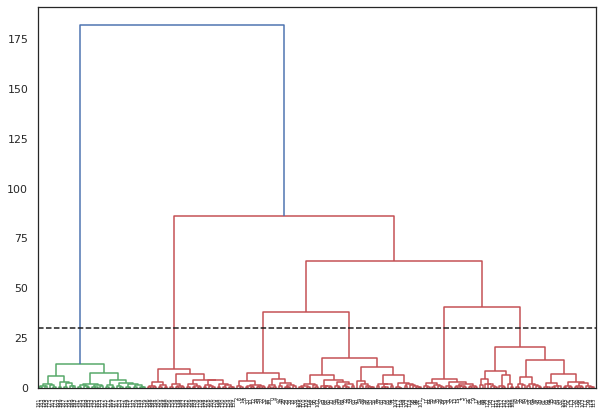

In [24]:
# analise por Dendrograma dos clusters
from scipy.cluster.hierarchy import dendrogram, ward

sns.set(style='white')
plt.figure(figsize=(10,7))
link = ward(res_tsne)
dendrogram(link)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [30,30],'--', c='k')
ax.plot(bounds,'--', c='k')
plt.show()

O Dendrograma indica por seu ponto de análise que a clusterização ideal seria com 6 grupos, não 5.


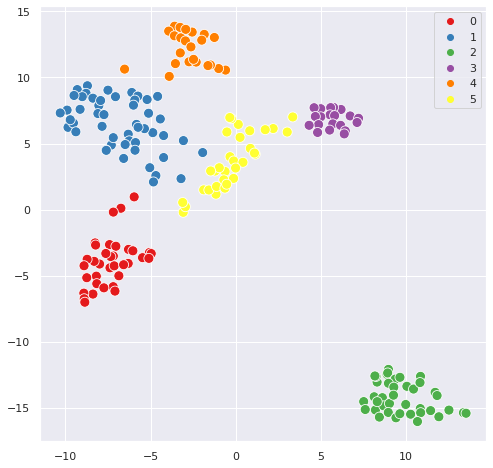

In [28]:
clus_mod = AgglomerativeClustering(n_clusters=6,linkage='ward')
assign = clus_mod.fit_predict(clientes)

plt.figure(figsize=(8,8))
sns.set(style='darkgrid',palette='muted')
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],s=100, hue=assign, palette='Set1');

**Centroide dos Clusters**

In [30]:
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid()
clf.fit(clientes, assign)

print(clientes.columns)
print(clf.centroids_)

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')
[[ 0.42857143 41.68571429 88.22857143 17.28571429]
 [ 0.58823529 53.21568627 55.11764706 49.47058824]
 [ 0.53846154 32.69230769 86.53846154 82.12820513]
 [ 0.6        24.85       24.95       81.        ]
 [ 0.60869565 45.2173913  26.30434783 20.91304348]
 [ 0.625      24.53125    54.1875     50.25      ]]
